In [1]:
# 1. Install Transformers (if not already installed)
!pip install transformers


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [2]:
!pip install transformers datasets accelerate peft -q


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [1]:
pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 20.3 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 23.0.1
    Uninstalling pip-23.0.1:
      Successfully uninstalled pip-23.0.1
Note: you may need to restart the kernel to use updated packages.


#Importing required libraries

In [3]:
from transformers import AutoTokenizer,AutoModelForCausalLM, BitsAndBytesConfig

/usr/local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/usr/local/lib/python3.10/site-packages/torch_xla/__init__.py:251: UserWarning: `tensorflow` can conflict with `torch-xla`. Prefer `tensorflow-cpu` when using PyTorch/XLA. To silence this warning, `pip uninstall -y tensorflow && pip install tensorflow-cpu`. If you are in a notebook environment such as Colab or Kaggle, restart your notebook runtime afterwards.
  warnings.warn(


In [6]:
!pip install transformers accelerate peft

In [3]:
import pandas as pd
import numpy as np

print("Pandas version:", pd.__version__)
print("Numpy version:", np.__version__)

Pandas version: 2.2.3
Numpy version: 2.0.2


In [4]:
import os
print(os.path.exists("/kaggle/input/clinical-reasoning-dataset/train.csv"))


True


In [6]:
import pandas as pd

train_df = pd.read_csv("/kaggle/input/clinical-reasoning-dataset/train.csv")
test_df = pd.read_csv("/kaggle/input/clinical-reasoning-dataset/test.csv")

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Master_Index         400 non-null    object 
 1   County               400 non-null    object 
 2   Health level         400 non-null    object 
 3   Years of Experience  300 non-null    float64
 4   Prompt               400 non-null    object 
 5   Nursing Competency   400 non-null    object 
 6   Clinical Panel       400 non-null    object 
 7   Clinician            400 non-null    object 
 8   GPT4.0               400 non-null    object 
 9   LLAMA                400 non-null    object 
 10  GEMINI               400 non-null    object 
 11  DDX SNOMED           399 non-null    object 
dtypes: float64(1), object(11)
memory usage: 37.6+ KB


In [8]:
train_df.columns

Index(['Master_Index', 'County', 'Health level', 'Years of Experience',
       'Prompt', 'Nursing Competency', 'Clinical Panel', 'Clinician', 'GPT4.0',
       'LLAMA', 'GEMINI', 'DDX SNOMED'],
      dtype='object')

In [10]:

train_df.drop('Master_Index', axis=1, inplace=True) 

In [13]:
train_df.isnull().sum()

County                   0
Health level             0
Years of Experience    100
Prompt                   0
Nursing Competency       0
Clinical Panel           0
Clinician                0
GPT4.0                   0
LLAMA                    0
GEMINI                   0
DDX SNOMED               1
dtype: int64

<Axes: xlabel='Years of Experience', ylabel='Count'>

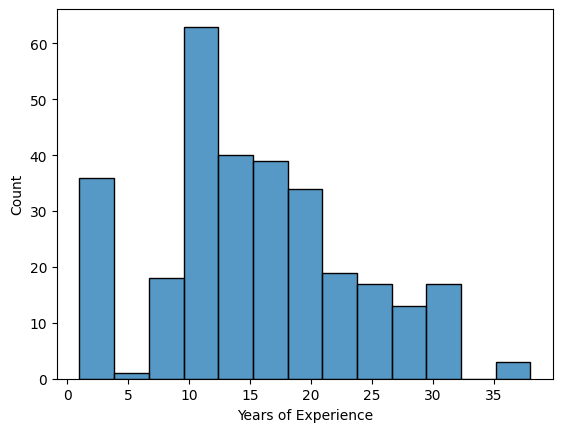

In [16]:
import seaborn as sns
sns.histplot(data=train_df, x='Years of Experience')

In [18]:
median_exp = train_df["Years of Experience"].median()
train_df["Years of Experience"] = train_df["Years of Experience"].fillna(median_exp)

In [19]:
train_df.isnull().sum()

County                 0
Health level           0
Years of Experience    0
Prompt                 0
Nursing Competency     0
Clinical Panel         0
Clinician              0
GPT4.0                 0
LLAMA                  0
GEMINI                 0
DDX SNOMED             1
dtype: int64

In [21]:
def build_context(row):
    return (
        f"County: {row['County']}, "
        f"Health level: {row['Health level']}, "
        f"Years of Experience: {row['Years of Experience']}, "
        f"Nursing Competency: {row['Nursing Competency']}, "
        f"Clinical Panel: {row['Clinical Panel']}"
    )

train_df["Context"] = train_df.apply(build_context, axis=1)

# Construct the final SLM input prompt
train_df["Input"] = "Context: " + train_df["Context"] + "\nPrompt: " + train_df["Prompt"]

# Define target output
train_df["Target"] = train_df["Clinician"]

# Drop rows where Target is missing
train_df = train_df[train_df["Target"].notna()]

# Save for training
train_df[["Input", "Target"]].to_csv("formatted_train_data.csv", index=False)

# 

In [22]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

model_id = "google/flan-t5-small"

# Load model
tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForSeq2SeqLM.from_pretrained(model_id)

# Define prompt
prompt = """
Context: County: Kisumu, Health level: Level 3, Years of Experience: 10, Nursing Competency: High
Prompt: A 22-year-old woman presents with fever, abdominal pain, and delayed menstruation.
What would the clinician do?
"""

# Tokenize
inputs = tokenizer(prompt, return_tensors="pt")

# Generate
outputs = model.generate(**inputs, max_new_tokens=100)

# Decode and print
print(tokenizer.decode(outputs[0], skip_special_tokens=True))

/usr/local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/usr/local/lib/python3.10/site-packages/torch_xla/__init__.py:251: UserWarning: `tensorflow` can conflict with `torch-xla`. Prefer `tensorflow-cpu` when using PyTorch/XLA. To silence this warning, `pip uninstall -y tensorflow && pip install tensorflow-cpu`. If you are in a notebook environment such as Colab or Kaggle, restart your notebook runtime afterwards.
  warnings.warn(
E0000 00:00:1751081089.595018      10 common_lib.cc:612] Could not set metric server port: INVALID_ARGUMENT: Could not find SliceBuilder port 8471 in any of the 0 ports provided in `tpu_process_addresses`="local"
=== Source Location Trace: ===
learning/45eac/tfrc/runtime/common_lib.cc:230


perform a syringe treatment.


In [11]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("google/flan-t5-small")

def preprocess(example):
    return tokenizer(
        ["clinical prompt: " + x for x in example["input"]],
        text_target=example["output"],
        truncation=True,
        padding="max_length",
        max_length=512
    )

tokenized_train_2 = train_dataset_2.map(preprocess, batched=True)

tokenizer_config.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

Map:   0%|          | 0/400 [00:00<?, ? examples/s]

In [12]:
from transformers import AutoModelForSeq2SeqLM

model = AutoModelForSeq2SeqLM.from_pretrained("google/flan-t5-small").to("cpu")

config.json:   0%|          | 0.00/1.40k [00:00<?, ?B/s]

2025-06-21 17:00:06.178152: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750525206.376955      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750525206.431061      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


model.safetensors:   0%|          | 0.00/308M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

In [21]:
from transformers import TrainingArguments, Trainer, DataCollatorForSeq2Seq
import torch

training_args = TrainingArguments(
    output_dir="./finetuned-flan-t5-reasoning",
    per_device_train_batch_size=4,
    num_train_epochs=5,
    learning_rate=5e-5,
    fp16=torch.cuda.is_available(),
    logging_steps=10
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset= tokenized_train_2,
    tokenizer=tokenizer,
    data_collator=DataCollatorForSeq2Seq(tokenizer, model=model)
)

trainer.train()

/tmp/ipykernel_35/4218151511.py:13: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


<IPython.core.display.Javascript object>

KeyboardInterrupt: 